Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumor is malignant or benign. Other cases have more than two outcomes to classify, in this case it is called multinomial. A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.

Here we will be using basic logistic regression to predict a binomial variable. This means it has only two possible outcomes.

In [35]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.

y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [7]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

[0]


Coefficient

In logistic regression the coefficient is the expected change in log-odds of having the outcome per unit change in X.

This does not have the most intuitive understanding so let's use it to create something that makes more sense, odds.

In [8]:
#Reshaped for Logistic function.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)

[[4.03557295]]


This tells us that as the size of a tumor increases by 1mm the odds of it being a cancerous tumor increases by 4x.

Probability

The coefficient and intercept values can be used to find the probability that each tumor is cancerous.

Create a function that uses the model's coefficient and intercept values to return a new value. This new value represents probability that the given observation is a tumor:

In [9]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


In [12]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.9733333333333334


Implementing Grid Search

We will follow the same steps of before except this time we will set a range of values for C.

Knowing which values to set for the searched parameters will take a combination of domain knowledge and practice.

Since the default value for C is 1, we will set a range of values surrounding it.

In [14]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


Results Explained

We can see that the lower values of C performed worse than the base parameter of 1. However, as we increased the value of C to 1.75 the model experienced increased accuracy.

It seems that increasing C beyond this amount does not help increase model accuracy.

*Note on Best Practices*

We scored our logistic regression model by using the same data that was used to train it. If the model corresponds too closely to that data, it may not be great at predicting unseen data. This statistical error is known as over fitting.

To avoid being misled by the scores on the training data, we can put aside a portion of our data and use it specifically for the purpose of testing the model. Refer to the lecture on train/test splitting to avoid being misled and overfitting.

Preprocessing - Categorical Data

Categorical Data

When your data has categories represented by strings, it will be difficult to use them to train machine learning models which often only accepts numeric data.

Instead of ignoring the categorical data and excluding the information from our model, you can tranform the data so it can be used in your models.

Take a look at the table below, it is the same data set that we used in the multiple regression chapter.

In [21]:
cars = pd.read_csv('data_2.csv')
print(cars.to_string())

           Car       Model  Volume  Weight  CO2
0       Toyota        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

One Hot Encoding

We cannot make use of the Car or Model column in our data since they are not numeric. A linear relationship between a categorical variable, Car or Model, and a numeric variable, CO2, cannot be determined.

To fix this issue, we must have a numeric representation of the categorical variable. One way to do this is to have a column representing each group in the category.

For each column, the values will be 1 or 0 where 1 represents the inclusion of the group and 0 represents the exclusion. This transformation is called one hot encoding.

You do not have to do this manually, the Python Pandas module has a function that called get_dummies() which does one hot encoding.

In [22]:
#One Hot Encode the Car column:

ohe_cars = pd.get_dummies(cars[['Car']])

print(ohe_cars.to_string())

    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  Car_Mazda  Car_Mercedes  Car_Mini  Car_Mitsubishi  Car_Opel  Car_Skoda  Car_Suzuki  Car_Toyota  Car_VW  Car_Volvo
0      False    False     False     False      False       False        False      False         False     False           False     False      False       False        True   False      False
1      False    False     False     False      False       False        False      False         False     False            True     False      False       False       False   False      False
2      False    False     False     False      False       False        False      False         False     False           False     False       True       False       False   False      False
3      False    False      True     False      False       False        False      False         False     False           False     False      False       False       False   False      False
4      False    False     False    

A column was created for every car brand in the Car column.

Predict CO2

We can use this additional information alongside the volume and weight to predict CO2

To combine the information, we can use the concat() function from pandas.

First we will need to import a couple modules.

We will start with importing the Pandas.

In [24]:
cars = pd.read_csv("data_2.csv")
ohe_cars = pd.get_dummies(cars[['Car']])

X = pd.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

[122.45153299]


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We now have a coefficient for the volume, the weight, and each car brand in the data set

Dummifying


It is not necessary to create one column for each group in your category. The information can be retained using 1 column less than the number of groups you have.

For example, you have a column representing colors and in that column, you have two colors, red and blue.

In [25]:
colors = pd.DataFrame({'color': ['blue', 'red']})

print(colors)

  color
0  blue
1   red


What if you have more than 2 groups? How can the multiple groups be represented by 1 less column?

Let's say we have three colors this time, red, blue and green. When we get_dummies while dropping the first column, we get the following table.

In [26]:
colors = pd.DataFrame({'color': ['blue', 'red', 'green']})
dummies = pd.get_dummies(colors, drop_first=True)
dummies['color'] = colors['color']

print(dummies)

   color_green  color_red  color
0        False      False   blue
1        False       True    red
2         True      False  green


K-means

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

Here, we will show you how to estimate the best value for K using the elbow method, then use K-means clustering to group the data points into clusters.

How does it work?


First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

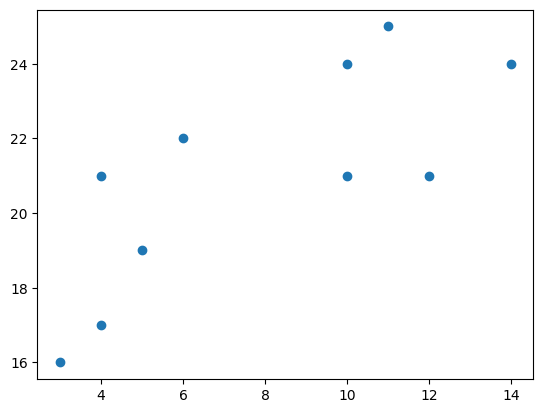

In [30]:
#Start by visualizing some data points:

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Now we utilize the elbow method to visualize the intertia for different values of K:

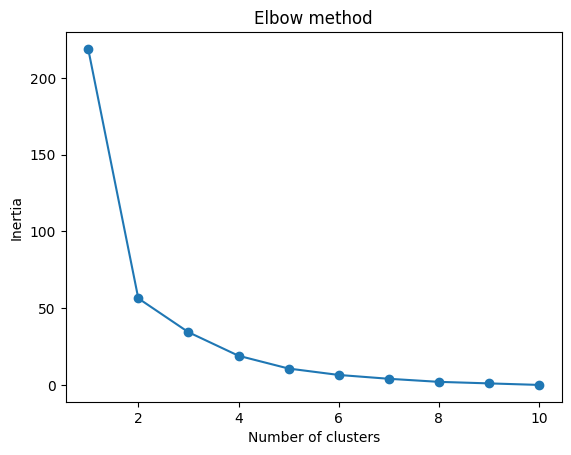

In [32]:
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that 2 is a good value for K, so we retrain and visualize the result:

We can see that the "elbow" on the graph above (where the interia becomes more linear) is at K=2. We can then fit our K-means algorithm one more time and plot the different clusters assigned to the data:

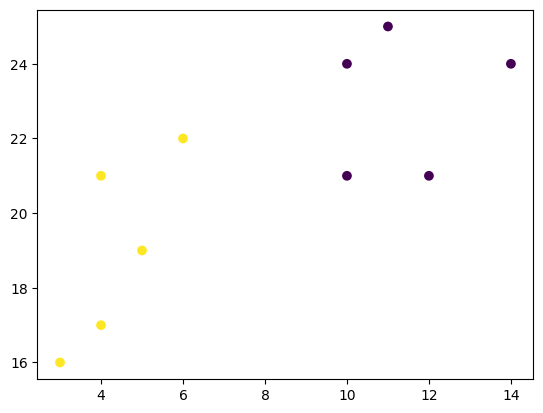

In [33]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

K-nearest neighbors (KNN)

KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.

Here, we will show you how to implement the KNN algorithm for classification, and show how different values of K affect the results.

How does it work?

K is the number of nearest neighbors to use. For classification, a majority vote is used to determined which class a new observation should fall into. Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results.

Start by visualizing some data points:

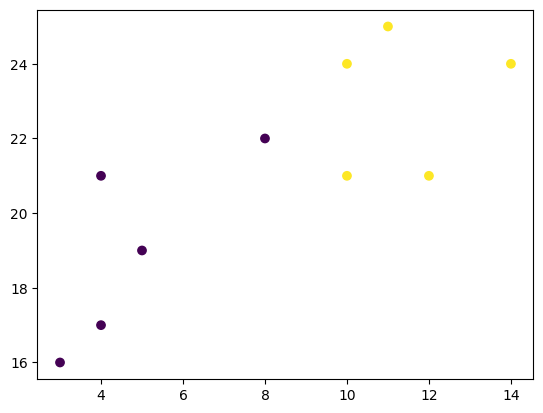

In [34]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

Now we fit the KNN algorithm with K=1:

In [36]:
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

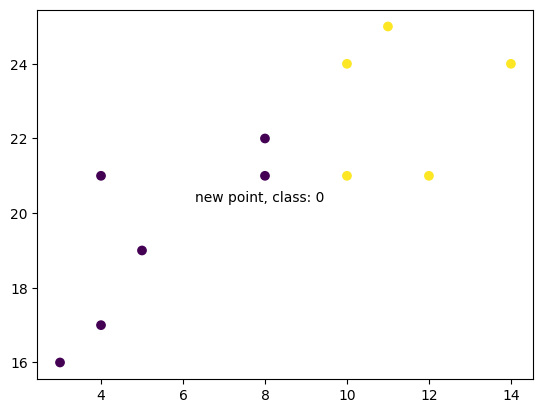

In [37]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Now we do the same thing, but with a higher K value which changes the prediction:

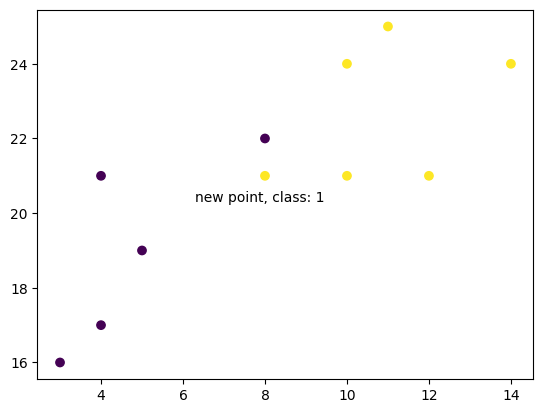

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

DONE WITH MACHINE LEARNING!!